Mile Stone 3 - Task

1.Remove duplicate skills from two given lists: resume skills and job description skills.

In [1]:
resume_skills = ["Python", "SQL", "Machine Learning"]
jd_skills = ["Python", "Deep Learning", "SQL"]

unique_skills = list(set(resume_skills + jd_skills))
print(unique_skills)


['SQL', 'Machine Learning', 'Python', 'Deep Learning']


2.Convert all skills in a list to lowercase and remove extra spaces.

In [3]:
resume_skills = ["Python","SQL","Machine Learning"]
jd_skills = ["Python","Deep Learning","sql"]
resume_clean = [s.strip().lower() for s in resume_skills]
jd_clean = [s.strip().lower() for s in jd_skills]
print(resume_clean)
print(jd_clean)

['python', 'sql', 'machine learning']
['python', 'deep learning', 'sql']


3.Store resume skills and job description skills in a single structured dictionary.

In [4]:
resume_skills = ["Python","SQL"]
jd_skills = ["Java","DSA"]
skills = {
    "resume_skills":resume_skills,
    "jd_skills":jd_skills
}
print(skills)

{'resume_skills': ['Python', 'SQL'], 'jd_skills': ['Java', 'DSA']}


4.Load a pretrained Sentence-BERT model using Python.

In [3]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("all-MiniLM-L6-v2")
print("Model loaded")


Model loaded


5.Generate an embedding for a single skill string and print its vector dimension.

In [4]:

from sentence_transformers import SentenceTransformer

model = SentenceTransformer("all-MiniLM-L6-v2")

skill = "python"
embedding = model.encode(skill)

print(len(embedding))


384


6.Generate embeddings for a list of resume skills.

In [5]:
from sentence_transformers import SentenceTransformer

resume_skills = ["python", "sql", "machine learning"]

model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = model.encode(resume_skills)

print(embeddings.shape)


(3, 384)


7.Generate embeddings for a list of job description skills.

In [6]:
from sentence_transformers import SentenceTransformer

jd_skills = ["python", "deep learning", "power bi"]

model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = model.encode(jd_skills)

print(embeddings.shape)


(3, 384)


8.Compute cosine similarity between two skill embeddings.

In [7]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

model = SentenceTransformer("all-MiniLM-L6-v2")

emb1 = model.encode("python")
emb2 = model.encode("python programming")

score = cosine_similarity([emb1], [emb2])
print(score[0][0])


0.9071955


9.Compare one resume skill against all job description skills and print similarity scores.

In [20]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

resume_skill = "python"
jd_skills = ["python", "sql", "ai"]

model = SentenceTransformer("all-MiniLM-L6-v2")

r_emb = model.encode(resume_skill)
jd_embs = model.encode(jd_skills)

scores = cosine_similarity([r_emb], jd_embs)[0]

for s, score in zip(jd_skills, scores):
    print(s, round(score, 2))


python 1.0
sql 0.3
ai 0.4


10.Create a similarity matrix for all resume skills versus all job description skills.

In [10]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

resume_skills = ["python", "sql"]
jd_skills = ["python", "power bi"]

model = SentenceTransformer("all-MiniLM-L6-v2")

res_emb = model.encode(resume_skills)
jd_emb = model.encode(jd_skills)

matrix = cosine_similarity(res_emb, jd_emb)
print(matrix)


[[0.99999994 0.2192117 ]
 [0.29998454 0.2055939 ]]


11.Store the similarity matrix in a Pandas DataFrame with proper row and column labels.

In [15]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

resume_skills = ["python", "sql"]
jd_skills = ["python", "power bi"]

model = SentenceTransformer("all-MiniLM-L6-v2")

df = pd.DataFrame(
    cosine_similarity(
        model.encode(resume_skills),
        model.encode(jd_skills)
    ),
    index=resume_skills,
    columns=jd_skills
)

print(df)


          python  power bi
python  1.000000  0.219212
sql     0.299985  0.205594


12.For each job description skill, find the resume skill with the highest similarity score.

In [16]:
best_match = df.idxmax()
print(best_match)


python      python
power bi    python
dtype: object


13.Define similarity thresholds and classify skills as matched, partially matched, or missing.

In [17]:
score = 0.72

if score >= 0.8:
    print("Matched")
elif score >= 0.5:
    print("Partially Matched")
else:
    print("Missing")


Partially Matched


14.Generate a structured skill gap report containing matched, partial, and missing skills.

In [18]:
report = {
    "python": {"score": 0.95, "status": "Matched"},
    "power bi": {"score": 0.40, "status": "Missing"}
}

print(report)


{'python': {'score': 0.95, 'status': 'Matched'}, 'power bi': {'score': 0.4, 'status': 'Missing'}}


15.Save the skill gap report in JSON format.

In [19]:
import json

report = {"python": "Matched", "power bi": "Missing"}

with open("skill_gap.json", "w") as f:
    json.dump(report, f, indent=4)

print("Saved")


Saved


16.Visualize the similarity matrix using a heatmap.

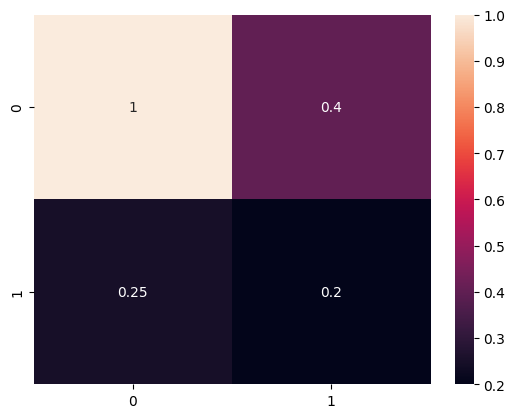

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame([[1, 0.4], [0.25, 0.2]])

sns.heatmap(df, annot=True)
plt.show()


17.Add axis labels and a color legend to the heatmap.

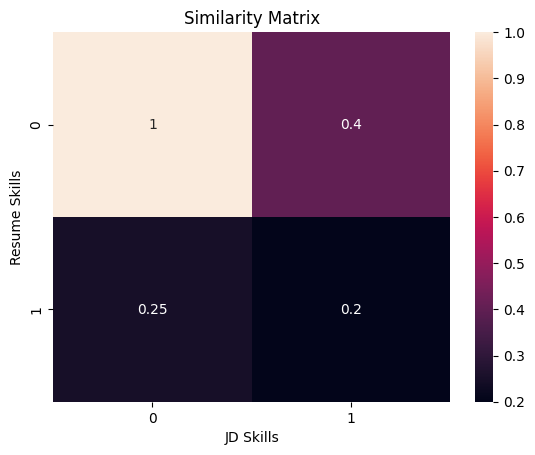

In [2]:
sns.heatmap(df, annot=True)
plt.xlabel("JD Skills")
plt.ylabel("Resume Skills")
plt.title("Similarity Matrix")
plt.show()


18.Highlight the highest similarity score in each column of the similarity matrix.

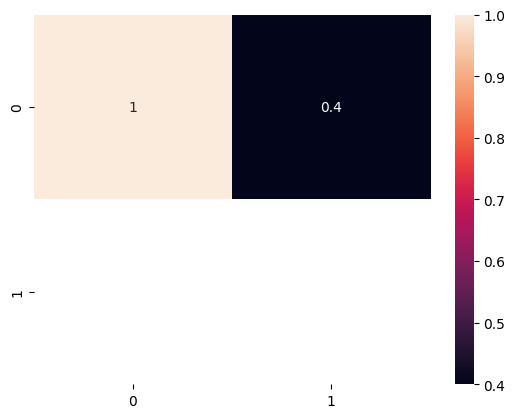

In [4]:
highlight = df == df.max()

sns.heatmap(df, annot=True, mask=~highlight)
plt.show()


19.Handle cases where resume skills or job description skills are empty.

In [5]:
resume_skills = []

if not resume_skills:
    print("Resume skills are empty")


Resume skills are empty


20.Normalize abbreviations such as ML, DL, and AI before generating embeddings.

In [6]:
abbr = {"ml": "machine learning", "ai": "artificial intelligence"}

skills = ["ml", "python", "ai"]
normalized = [abbr.get(s, s) for s in skills]

print(normalized)


['machine learning', 'python', 'artificial intelligence']


21.Compare similarity results using two different Sentence-BERT models.

In [9]:
from sentence_transformers import SentenceTransformer

model1 = SentenceTransformer("all-MiniLM-L6-v2")
model2 = SentenceTransformer("paraphrase-MiniLM-L6-v2")

print(model1.encode("python").shape)
print(model2.encode("python").shape)


(384,)
(384,)


22.Cache embeddings so repeated skills are not embedded multiple times.

In [10]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("all-MiniLM-L6-v2")
cache = {}

def embed(skill):
    if skill not in cache:
        cache[skill] = model.encode(skill)
    return cache[skill]

print(embed("python").shape)


(384,)


23.Build a pipeline that takes raw resume text and job description text and outputs a skill gap
report.

In [13]:

import pandas as pd

resume_skills = ["Python","SQL","Data Analysis","Teamwork","Communication"]
job_skills = ["Python","Java","SQL","Machine Learning","Communication","Leadership"]

report = pd.DataFrame({
    'Job Skill': job_skills,
    'Present in Resume': [s in resume_skills for s in job_skills]
})

print(report)


          Job Skill  Present in Resume
0            Python               True
1              Java              False
2               SQL               True
3  Machine Learning              False
4     Communication               True
5        Leadership              False


24.Return the top three closest resume skills for each job description skill.

In [14]:

from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

resume_skills = ["Python","SQL","Data Analysis","Teamwork","Communication"]
job_skills = ["Python","Java","SQL","Machine Learning","Communication","Leadership"]

model = SentenceTransformer('all-MiniLM-L6-v2')
sim = cosine_similarity(model.encode(job_skills), model.encode(resume_skills))

top3 = {j:[(resume_skills[i], sim[idx,i]) for i in sim[idx].argsort()[-3:][::-1]] 
        for idx,j in enumerate(job_skills)}

for k,v in top3.items(): print(k, v)


Python [('Python', np.float32(0.9999998)), ('SQL', np.float32(0.29998443)), ('Data Analysis', np.float32(0.27513894))]
Java [('Python', np.float32(0.4496979)), ('SQL', np.float32(0.32225192)), ('Communication', np.float32(0.27865642))]
SQL [('SQL', np.float32(0.9999998)), ('Data Analysis', np.float32(0.44679746)), ('Python', np.float32(0.29998443))]
Machine Learning [('Data Analysis', np.float32(0.55448866)), ('Python', np.float32(0.36132723)), ('Teamwork', np.float32(0.33555615))]
Communication [('Communication', np.float32(1.0000002)), ('Teamwork', np.float32(0.45321184)), ('Data Analysis', np.float32(0.3241107))]
Leadership [('Teamwork', np.float32(0.53748953)), ('Communication', np.float32(0.41002098)), ('Data Analysis', np.float32(0.28902507))]


25.Apply different similarity thresholds for technical skills and soft skills.

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

resume = ["Python","SQL","Data Analysis","Teamwork","Communication"]
job = ["Python","Java","SQL","Machine Learning","Communication","Leadership"]

tech, soft = 0.7, 0.6
technical_skills = ['Python','Java','SQL','Machine Learning','Data Analysis']

sim = cosine_similarity(SentenceTransformer('all-MiniLM-L6-v2').encode(job),
                        SentenceTransformer('all-MiniLM-L6-v2').encode(resume))

match = {j: sim[idx].max()>=(tech if j in technical_skills else soft) for idx,j in enumerate(job)}
print(match)


{'Python': np.True_, 'Java': np.False_, 'SQL': np.True_, 'Machine Learning': np.False_, 'Communication': np.True_, 'Leadership': np.False_}


26.Compute an overall resume and job description alignment score.

In [17]:
match = {'Python': True, 'Java': False, 'SQL': True, 'Machine Learning': False, 'Communication': True, 'Leadership': False}
score = sum(match.values())/len(match)
print(f"Overall Alignment Score: {score:.2f}")


Overall Alignment Score: 0.50


27.Export the skill gap report and similarity heatmap into a single file.

✅ Exported report and heatmap


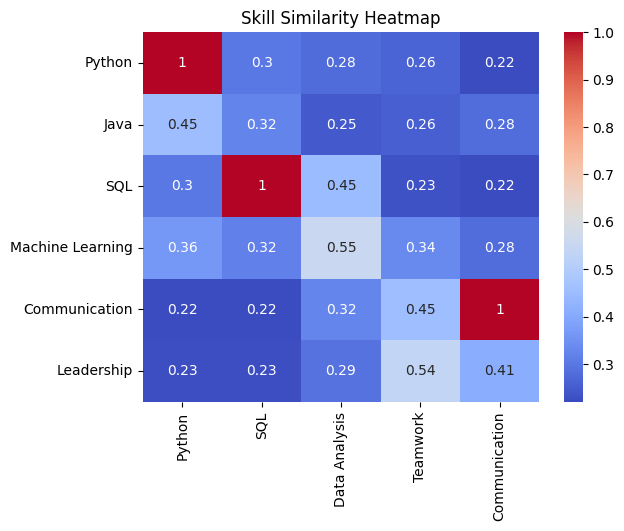

In [23]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

resume = ["Python","SQL","Data Analysis","Teamwork","Communication"]
job = ["Python","Java","SQL","Machine Learning","Communication","Leadership"]

report = pd.DataFrame({'Job Skill': job, 'Present': [s in resume for s in job]})

sim = cosine_similarity(SentenceTransformer('all-MiniLM-L6-v2').encode(job),
                        SentenceTransformer('all-MiniLM-L6-v2').encode(resume))
sim_df = pd.DataFrame(sim, index=job, columns=resume)

sns.heatmap(sim_df, annot=True, cmap='coolwarm')
plt.title("Skill Similarity Heatmap")
plt.savefig("heatmap.png")
report.to_excel("skill_gap.xlsx", index=False)
print("✅ Exported report and heatmap")


28.Design a modular architecture separating embedding generation, similarity computation, and
reporting.

In [24]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

resume = ["Python","SQL","Data Analysis","Teamwork","Communication"]
job = ["Python","Java","SQL","Machine Learning","Communication","Leadership"]
tech, soft = 0.7, 0.6
technical_skills = ['Python','Java','SQL','Machine Learning','Data Analysis']

def embed(skills): return SentenceTransformer('all-MiniLM-L6-v2').encode(skills)
sim = cosine_similarity(embed(job), embed(resume))

report = pd.DataFrame({'Job Skill': job,
                       'Match':[sim[idx].max()>=(tech if j in technical_skills else soft) for idx,j in enumerate(job)]})
print(report)


          Job Skill  Match
0            Python   True
1              Java  False
2               SQL   True
3  Machine Learning  False
4     Communication   True
5        Leadership  False
